# Competição Externa - BigData

texto texto texto

## Bibliotecas que serão usadas

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.cm import get_cmap

from pandas_profiling import ProfileReport

plt.style.use("ggplot")

## Lendo os dados


In [102]:
data = pd.read_csv("data/faturamento_lojas_atuais.csv")

data.head(10)

cod_loja   ano  mes categoria   qtde   receita
0         1  2016    1  CATEG_01  301.0   9164.86
1         1  2016    2  CATEG_01  187.0   8175.55
2         1  2016    3  CATEG_01  242.0  10521.67
3         1  2016    4  CATEG_01  104.0   4560.91
4         1  2016    5  CATEG_01  100.0   4263.30
5         1  2016    6  CATEG_01  108.0   4741.36
6         1  2016    7  CATEG_01  111.0   5604.77
7         1  2016    8  CATEG_01   86.0   3987.35
8         1  2016    9  CATEG_01  148.0   5543.12
9         1  2016   10  CATEG_01  147.0   4996.06

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB


Para o começo, vamos fazer um profilling.

In [104]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [105]:
profile.to_file("report-fla-1.html")

## Analise dos dados

### Receita / Qtde

Para começar a analise dos dados vamos criar mais um atributo, ele vai verificar a "Receita / Quantidade", vai ajudar a verificar a relação entre ambos os atributos.

In [106]:
data["rec_un"] = data["receita"] / data["qtde"]

data.head(10)

cod_loja   ano  mes categoria   qtde   receita     rec_un
0         1  2016    1  CATEG_01  301.0   9164.86  30.448040
1         1  2016    2  CATEG_01  187.0   8175.55  43.719519
2         1  2016    3  CATEG_01  242.0  10521.67  43.477975
3         1  2016    4  CATEG_01  104.0   4560.91  43.854904
4         1  2016    5  CATEG_01  100.0   4263.30  42.633000
5         1  2016    6  CATEG_01  108.0   4741.36  43.901481
6         1  2016    7  CATEG_01  111.0   5604.77  50.493423
7         1  2016    8  CATEG_01   86.0   3987.35  46.364535
8         1  2016    9  CATEG_01  148.0   5543.12  37.453514
9         1  2016   10  CATEG_01  147.0   4996.06  33.986803

Vamos agrupar as categorias e fazer analises a partir delas.

In [107]:
data_categorias = data.groupby(["categoria"])

Vamos verificar a receita unitaria por categoria.

In [108]:
# Categoria, Soma da receita, Soma da receita unitária, Média da receita unitária
receita_unitaria_categoria = [[], [], [], []]

print("Categoria\t\tReceita\t\t\tReceitaUnitária")

for (cat, df) in data_categorias:
    receita_unitaria_categoria[0].append(cat)
    receita_unitaria_categoria[1].append(df.receita.sum())
    receita_unitaria_categoria[2].append(df.rec_un.sum())
    receita_unitaria_categoria[3].append(df.rec_un.mean())
    print("{}\t\t{:.3f}\t\t{:.3f}".format(
        receita_unitaria_categoria[0][len(receita_unitaria_categoria[0]) - 1],
        receita_unitaria_categoria[1][len(receita_unitaria_categoria[0]) - 1],
        receita_unitaria_categoria[2][len(receita_unitaria_categoria[1]) - 1])
    )

Categoria		Receita			ReceitaUnitária
CATEG_01		69459537.750		2125339.350
CATEG_02		7507082.780		1580406.550
CATEG_03		335854146.210		2171944.377
CATEG_04		116636953.570		2746816.951
CATEG_05		1189124313.640		2959746.941
CATEG_06		104199931.450		3824528.893
CATEG_07		569669595.370		1643342.829
CATEG_08		722160378.980		7555989.557
CATEG_09		941137765.890		2617596.438
CATEG_10		178655007.820		3554679.373
CATEG_11		4610573177.400		6739007.524
CATEG_12		445713418.950		1277777.579
CATEG_13		35811032.090		2959447.095
CATEG_14		36804060.180		185576.080
CATEG_15		30879.540		24446.548
CATEG_16		299.900		59.980


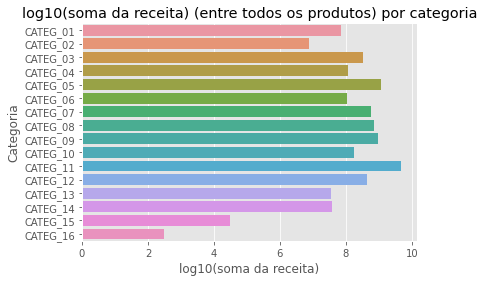

In [109]:
sns.barplot(y = receita_unitaria_categoria[0], x = np.log10(receita_unitaria_categoria[1]), orient = "h")

plt.title("log10(soma da receita) (entre todos os produtos) por categoria")
plt.xlabel("log10(soma da receita)")
plt.ylabel("Categoria")

plt.show()


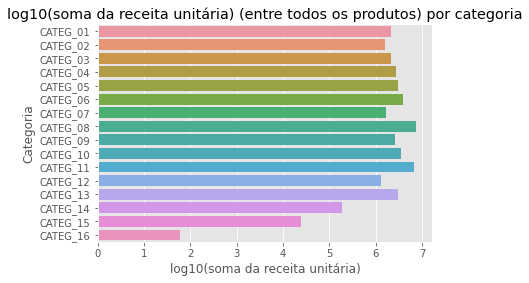

In [110]:
sns.barplot(y = receita_unitaria_categoria[0], x = np.log10(receita_unitaria_categoria[2]), orient = "h")

plt.title("log10(soma da receita unitária) (entre todos os produtos) por categoria")
plt.xlabel("log10(soma da receita unitária)")
plt.ylabel("Categoria")

plt.show()

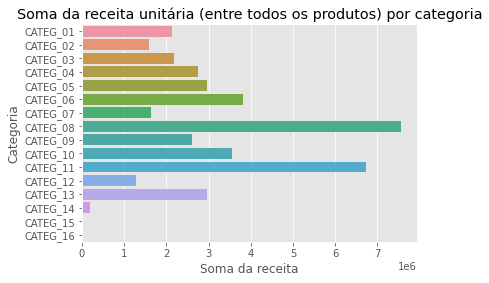

In [111]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[2], orient = "h")

plt.title("Soma da receita unitária (entre todos os produtos) por categoria")
plt.xlabel("Soma da receita")
plt.ylabel("Categoria")

plt.show()

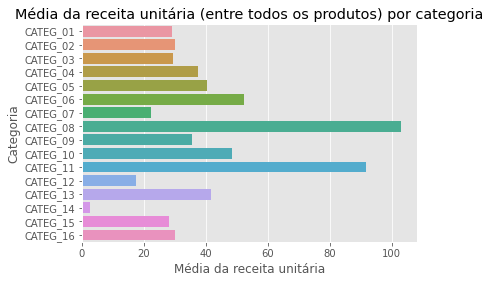

In [112]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[3], orient = "h")

plt.title("Média da receita unitária (entre todos os produtos) por categoria")
plt.xlabel("Média da receita unitária")
plt.ylabel("Categoria")

plt.show()

Analisando os gráficos obtidos, podemos identificar algumas questões e analisés relevantes:
- A soma da receita da `CATEG_11` é muito alta comparada a todas as outras cateogiras, porém na receita unitária ela é menor que a `CATEG_08`, isso pode acontecer devido a quantidade de produtos vendido na categoria 11 é muita alta e os da categoria 08 tem um valor muito alto por unidade.

Mais alguns gráficos que vai ser importante verificar:
- Podemos analisar a quantidade de produtos vendidos por categoria e analisar a variação da quantidade de produtos por período.
- Devemos analisar se existe picos de datas em que alguma categoria se sobressai sobre a outra e também verificar quais categorias vendem mais em diferentes períodos.

### Lojas com categorias combinadas

Vamos verificar como a receita das lojas de acordo com as diferentes combinações de categorias.

In [113]:
data_lojas = data.groupby(["cod_loja"])

In [114]:
receita_lojas_cats = {}

for (loja, df) in data_lojas:
    # Verifica as diferentes categorias que aquela loja possui
    categorias = list(df.categoria.unique())
    identificador = "/".join(categorias)

    # Guarda a combinação de categorias
    if identificador in receita_lojas_cats:
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())
    else:
        receita_lojas_cats[identificador] = {
            "lojas": [],
            "receita": [],
            "rec_un": []
        }
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())

In [115]:
i = 0
for label in receita_lojas_cats:
    print(i, label, "\n")
    i = i + 1

0 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

1 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

2 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15/CATEG_16 

3 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

4 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

5 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13 

6 CATEG_03/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

7 CATEG_01/CATEG_04/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

8 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CAT

Vamos mostrar alguns gráficos.

In [116]:
receita_cats = [[], [], []]

i = 0
for label in receita_lojas_cats:
    receita_cats[0].append(i)
    receita_cats[1].append(np.mean(receita_lojas_cats[label]["rec_un"]))
    receita_cats[2].append(len(receita_lojas_cats[label]["lojas"]))

    i = i + 1

In [117]:
receita_cats

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [13413.788673544781,
  13757.307109139885,
  14197.255381891446,
  9702.379142078682,
  13375.656735334098,
  680.2752299396939,
  490.15250087077675,
  409.75298786181133,
  571.1965627196722],
 [2479, 605, 1, 37, 1, 4, 1, 1, 1]]

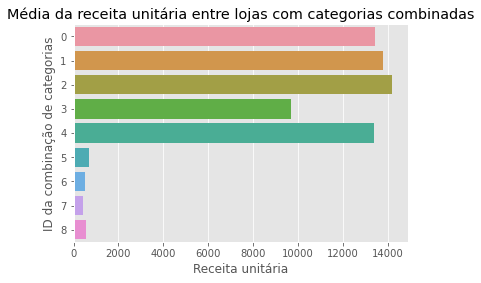

In [118]:
sns.barplot(y = receita_cats[0], x = receita_cats[1], orient = "h")

plt.title("Média da receita unitária entre lojas com categorias combinadas")
plt.xlabel("Receita unitária")
plt.ylabel("ID da combinação de categorias")

plt.show()

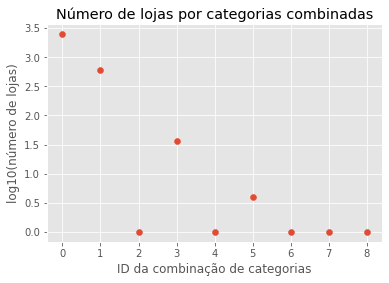

In [119]:
plt.scatter(receita_cats[0], np.log10(receita_cats[2]))

plt.xlabel("ID da combinação de categorias")
plt.ylabel("log10(número de lojas)")
plt.title("Número de lojas por categorias combinadas")

plt.show()

### Lidando com a data

Podemos deixar os dois atributos `mes, ano` em apenas um para facilitarm a visualização dos dados em diferentes períodos.

In [120]:
data["periodo"] = data["ano"].astype(str) + "/" + data["mes"].astype(str)

data.head(10)

cod_loja   ano  mes categoria   qtde   receita     rec_un  periodo
0         1  2016    1  CATEG_01  301.0   9164.86  30.448040   2016/1
1         1  2016    2  CATEG_01  187.0   8175.55  43.719519   2016/2
2         1  2016    3  CATEG_01  242.0  10521.67  43.477975   2016/3
3         1  2016    4  CATEG_01  104.0   4560.91  43.854904   2016/4
4         1  2016    5  CATEG_01  100.0   4263.30  42.633000   2016/5
5         1  2016    6  CATEG_01  108.0   4741.36  43.901481   2016/6
6         1  2016    7  CATEG_01  111.0   5604.77  50.493423   2016/7
7         1  2016    8  CATEG_01   86.0   3987.35  46.364535   2016/8
8         1  2016    9  CATEG_01  148.0   5543.12  37.453514   2016/9
9         1  2016   10  CATEG_01  147.0   4996.06  33.986803  2016/10

In [150]:
data_periodo = data.groupby("periodo", sort = False)

data_periodo.head()

cod_loja   ano  mes categoria    qtde    receita     rec_un  periodo
0           1  2016    1  CATEG_01   301.0    9164.86  30.448040   2016/1
1           1  2016    2  CATEG_01   187.0    8175.55  43.719519   2016/2
2           1  2016    3  CATEG_01   242.0   10521.67  43.477975   2016/3
3           1  2016    4  CATEG_01   104.0    4560.91  43.854904   2016/4
4           1  2016    5  CATEG_01   100.0    4263.30  42.633000   2016/5
..        ...   ...  ...       ...     ...        ...        ...      ...
115         1  2017    8  CATEG_05  1749.0   62146.01  35.532310   2017/8
116         1  2017    9  CATEG_05  2053.0   69288.90  33.750073   2017/9
117         1  2017   10  CATEG_05  2393.0   72079.84  30.121120  2017/10
118         1  2017   11  CATEG_05  2412.0   80089.67  33.204672  2017/11
119         1  2017   12  CATEG_05  4054.0  139537.60  34.419734  2017/12

[120 rows x 8 columns]

Agora que temos os dados por periodo, podemos ter construir gráficos e analisar a variação da receita durante diferentes períodos.

In [153]:
# Peridoo, Soma da receita, Soma unitária, Quantidade de produtos registrado no período
receita_periodo = [[], [], [], []]

for (periodo, df) in data_periodo:
    receita_periodo[0].append(periodo)
    receita_periodo[1].append(df.receita.sum())
    receita_periodo[2].append(df.rec_un.sum())
    receita_periodo[3].append(len(df))

In [154]:
receita_periodo

[['2016/1',
  '2016/2',
  '2016/3',
  '2016/4',
  '2016/5',
  '2016/6',
  '2016/7',
  '2016/8',
  '2016/9',
  '2016/10',
  '2016/11',
  '2016/12',
  '2017/1',
  '2017/2',
  '2017/3',
  '2017/4',
  '2017/5',
  '2017/6',
  '2017/7',
  '2017/8',
  '2017/9',
  '2017/10',
  '2017/11',
  '2017/12'],
 [364784885.18,
  258856554.21999997,
  308149053.94,
  316512361.31999993,
  455139463.60999995,
  381751283.27,
  316441839.51,
  379963075.99999994,
  314348342.2099999,
  342437947.8599999,
  398008640.85999995,
  798514916.3100001,
  320239402.79999995,
  271138378.7,
  329741026.83,
  317465906.17999995,
  484526962.46000004,
  407682016.53,
  312799418.05,
  402550481.5399999,
  333495140.21999997,
  327269302.14,
  436271894.93,
  785249286.85],
 [1339097.5880516798,
  1444428.8973037272,
  1591176.7372103666,
  1659021.5973224633,
  1653743.779890729,
  1712765.3875256574,
  1796971.9278093053,
  1840536.9691196603,
  1713068.2659489298,
  1609737.2162019894,
  1728218.7722152425,
  1881

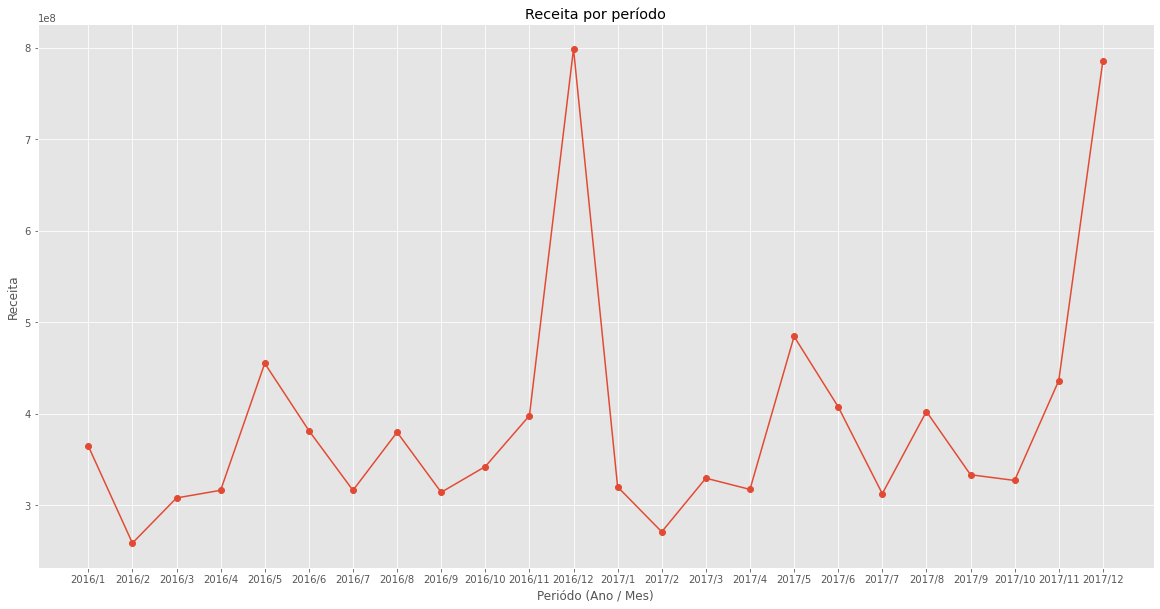

In [155]:
plt.figure(figsize = (20, 10))
plt.plot(receita_periodo[0], receita_periodo[1], marker = 'o')

plt.title("Receita por período")
plt.xlabel("Periódo (Ano / Mes)")
plt.ylabel("Receita")

plt.show()

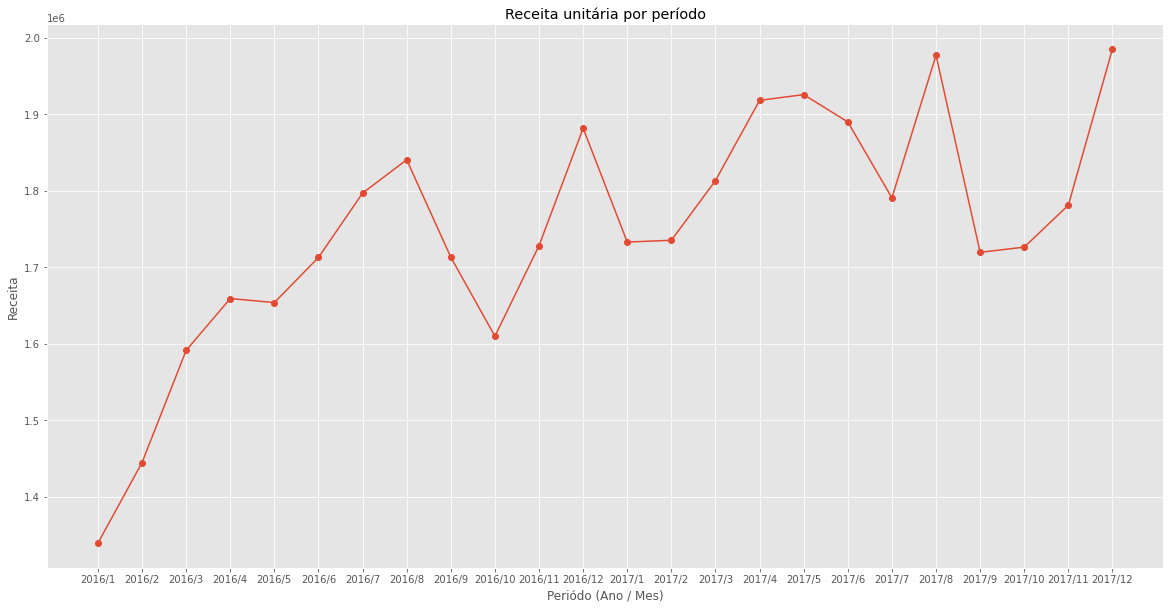

In [156]:
plt.figure(figsize = (20, 10))
plt.plot(receita_periodo[0], receita_periodo[2], marker = 'o')

plt.title("Receita unitária por período")
plt.xlabel("Periódo (Ano / Mes)")
plt.ylabel("Receita")

plt.show()

Outros gráficos que podem ser criados é a receita entre as diferentes categorias.

In [157]:
# Categoria = {Periodo, Receita, ReceitaUnitaria}
receita_cats_periodo = {}

for (periodo, df) in data_periodo:
    categorias_faltando_no_periodo = list(data.categoria.unique())

    for (cat, df_cat) in df.groupby(["categoria"]):
        categorias_faltando_no_periodo.remove(cat)

        if cat in receita_cats_periodo:
            receita_cats_periodo[cat]["receita"].append(df_cat.receita.sum())
            receita_cats_periodo[cat]["rec_un"].append(df_cat.rec_un.sum())
            receita_cats_periodo[cat]["periodo"].append(periodo)
        else:
            receita_cats_periodo[cat] = {
                "receita": [],
                "rec_un": [],
                "periodo": []
            }
            receita_cats_periodo[cat]["receita"].append(df_cat.receita.sum())
            receita_cats_periodo[cat]["rec_un"].append(df_cat.rec_un.sum())
            receita_cats_periodo[cat]["periodo"].append(periodo)
    
    # Garante que as categorias que não venderam no periodo terão o valor 0 no seu conjunto de dados
    for cat in categorias_faltando_no_periodo:
        if cat in receita_cats_periodo:
            receita_cats_periodo[cat]["receita"].append(0)
            receita_cats_periodo[cat]["rec_un"].append(0)
            receita_cats_periodo[cat]["periodo"].append(periodo)
        else:
            receita_cats_periodo[cat] = {
                "receita": [],
                "rec_un": [],
                "periodo": []
            }
            receita_cats_periodo[cat]["receita"].append(0)
            receita_cats_periodo[cat]["rec_un"].append(0)
            receita_cats_periodo[cat]["periodo"].append(periodo)


In [158]:
print(receita_cats_periodo)

{'CATEG_01': {'receita': [2626267.29, 2674323.74, 3237772.21, 3068946.5700000003, 3040889.46, 2812320.7399999998, 2511138.76, 2026337.4699999997, 2131467.83, 2562843.06, 2298175.88, 3759012.9699999997, 2275933.02, 1522227.46, 2213415.0, 1921425.75, 2872587.84, 2374250.38, 3547997.9400000004, 4129462.0100000002, 3678736.35, 3402691.52, 3463069.02, 5308245.48], 'rec_un': [75492.37044772173, 91422.04335461635, 92239.71965683988, 89290.85212402491, 87659.02094622806, 92295.92319931972, 92455.7943784242, 91915.44013998972, 92671.3193054189, 91587.98247816422, 88902.06847606543, 88813.78523137617, 81735.39752522265, 88766.61038374291, 93608.37442555562, 92378.35357217633, 90505.02136763156, 84383.33241890234, 70582.43965270341, 91308.25657508199, 91915.78708839712, 89353.36194977416, 84556.1169925975, 91499.97867002936], 'periodo': ['2016/1', '2016/2', '2016/3', '2016/4', '2016/5', '2016/6', '2016/7', '2016/8', '2016/9', '2016/10', '2016/11', '2016/12', '2017/1', '2017/2', '2017/3', '2017/4'

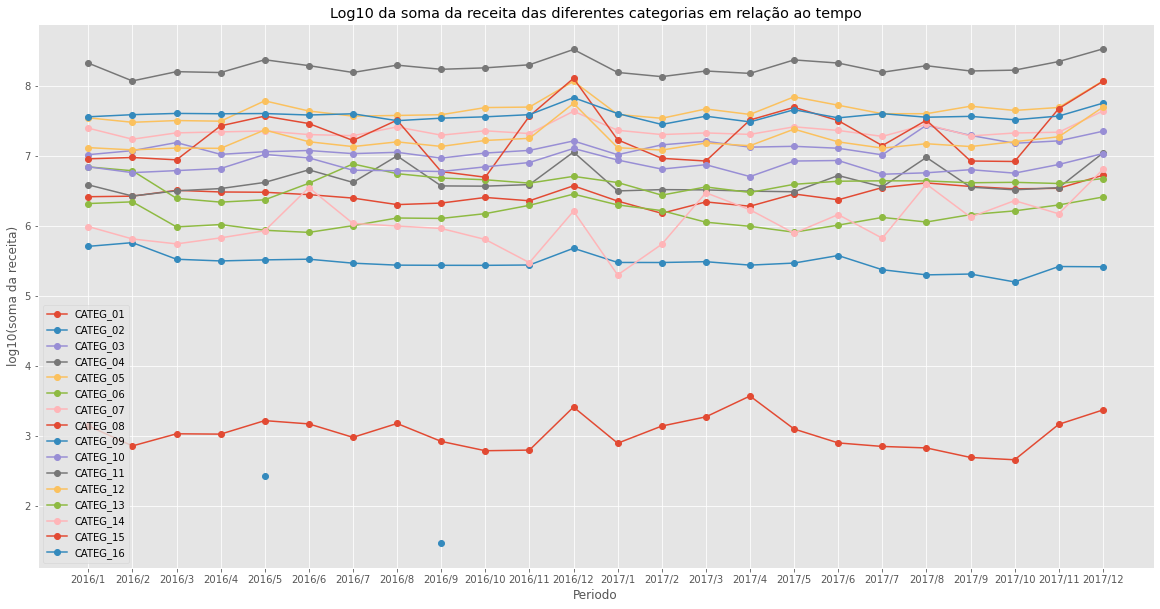

In [162]:
plt.figure(figsize = (20, 10))

for cat in receita_cats_periodo:
    plt.plot(receita_periodo[0], np.log10(receita_cats_periodo[cat]["receita"]), label = cat, marker = "o")

plt.legend()
plt.title("Log10 da soma da receita das diferentes categorias em relação ao tempo")
plt.xlabel("Periodo")
plt.ylabel("log10(soma da receita)")

plt.show()

Podemos ver pelo gráfico acima que a `CATEG_11` é predominante durante todo o tempo e é difiícil visualizar os dados dessa forma, então vamos ver a receita de cada categoria de forma separada.

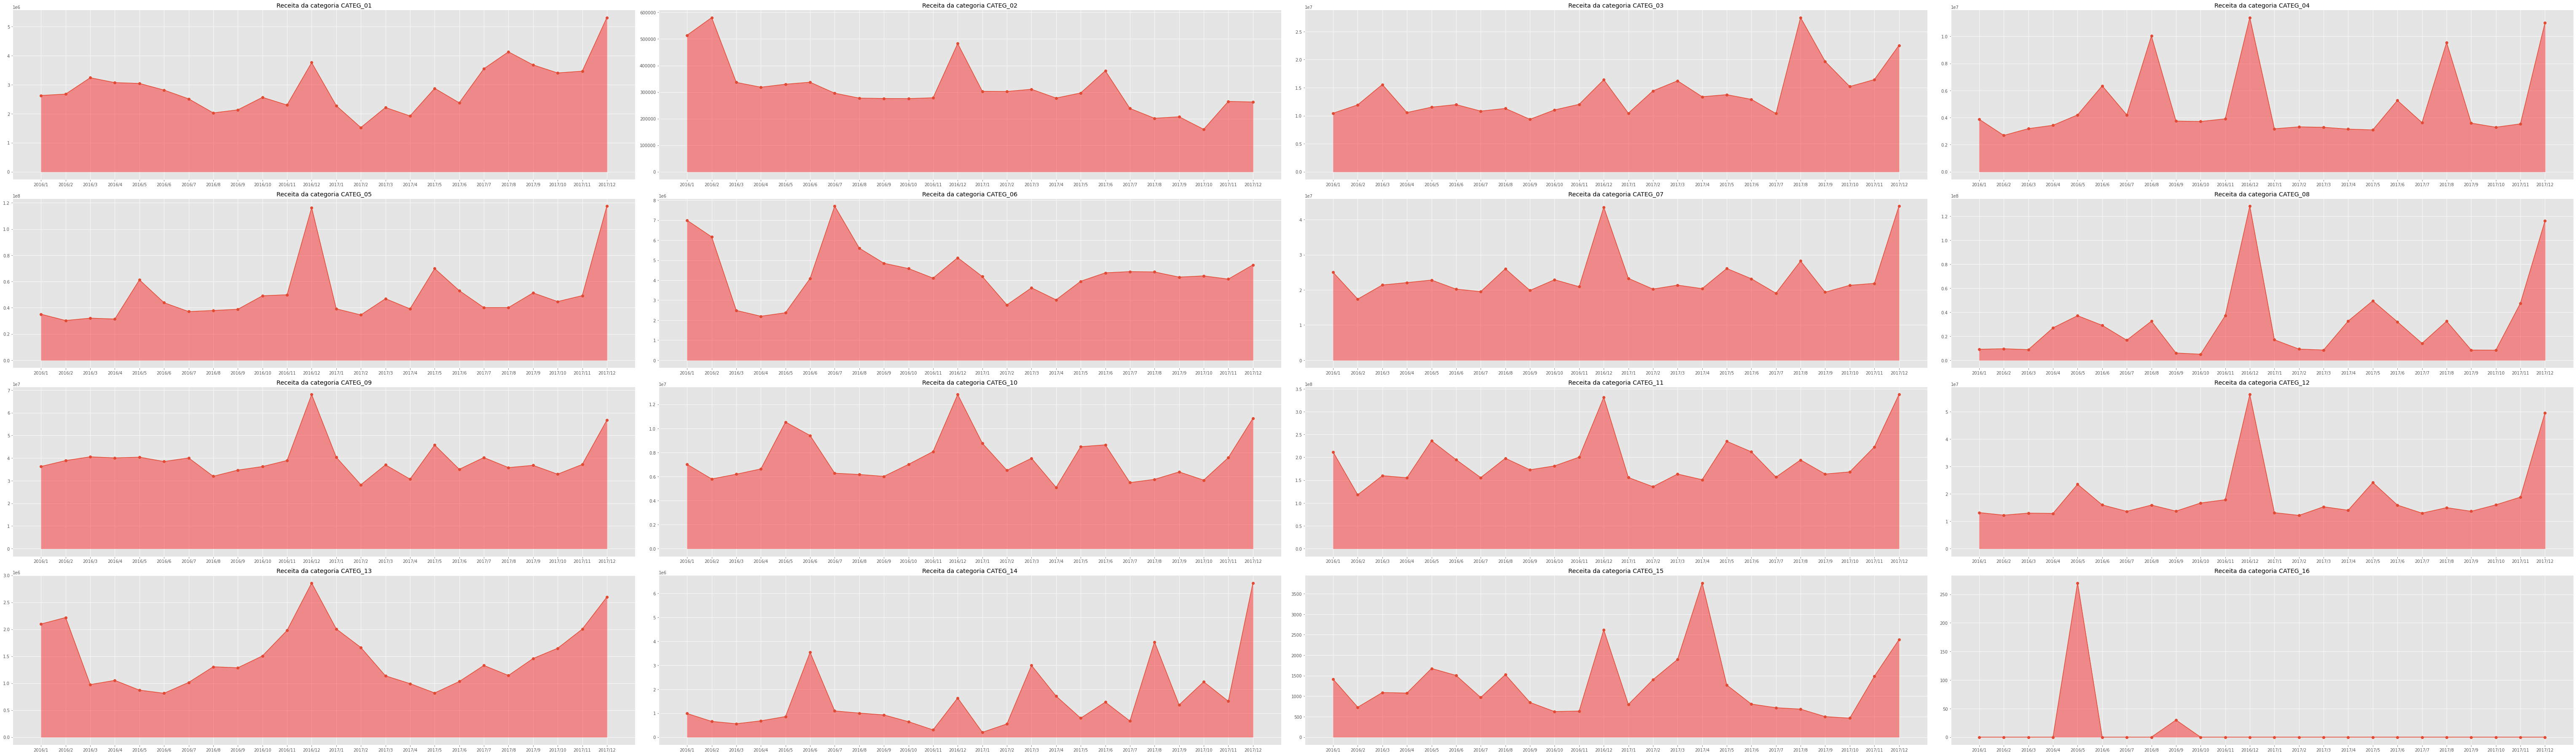

In [160]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["receita"], marker = "o")
    plt.fill_between(receita_periodo[0], receita_cats_periodo[cat]["receita"], color = "red", alpha = 0.4)
    plt.title("Receita da categoria {}".format(cat))

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

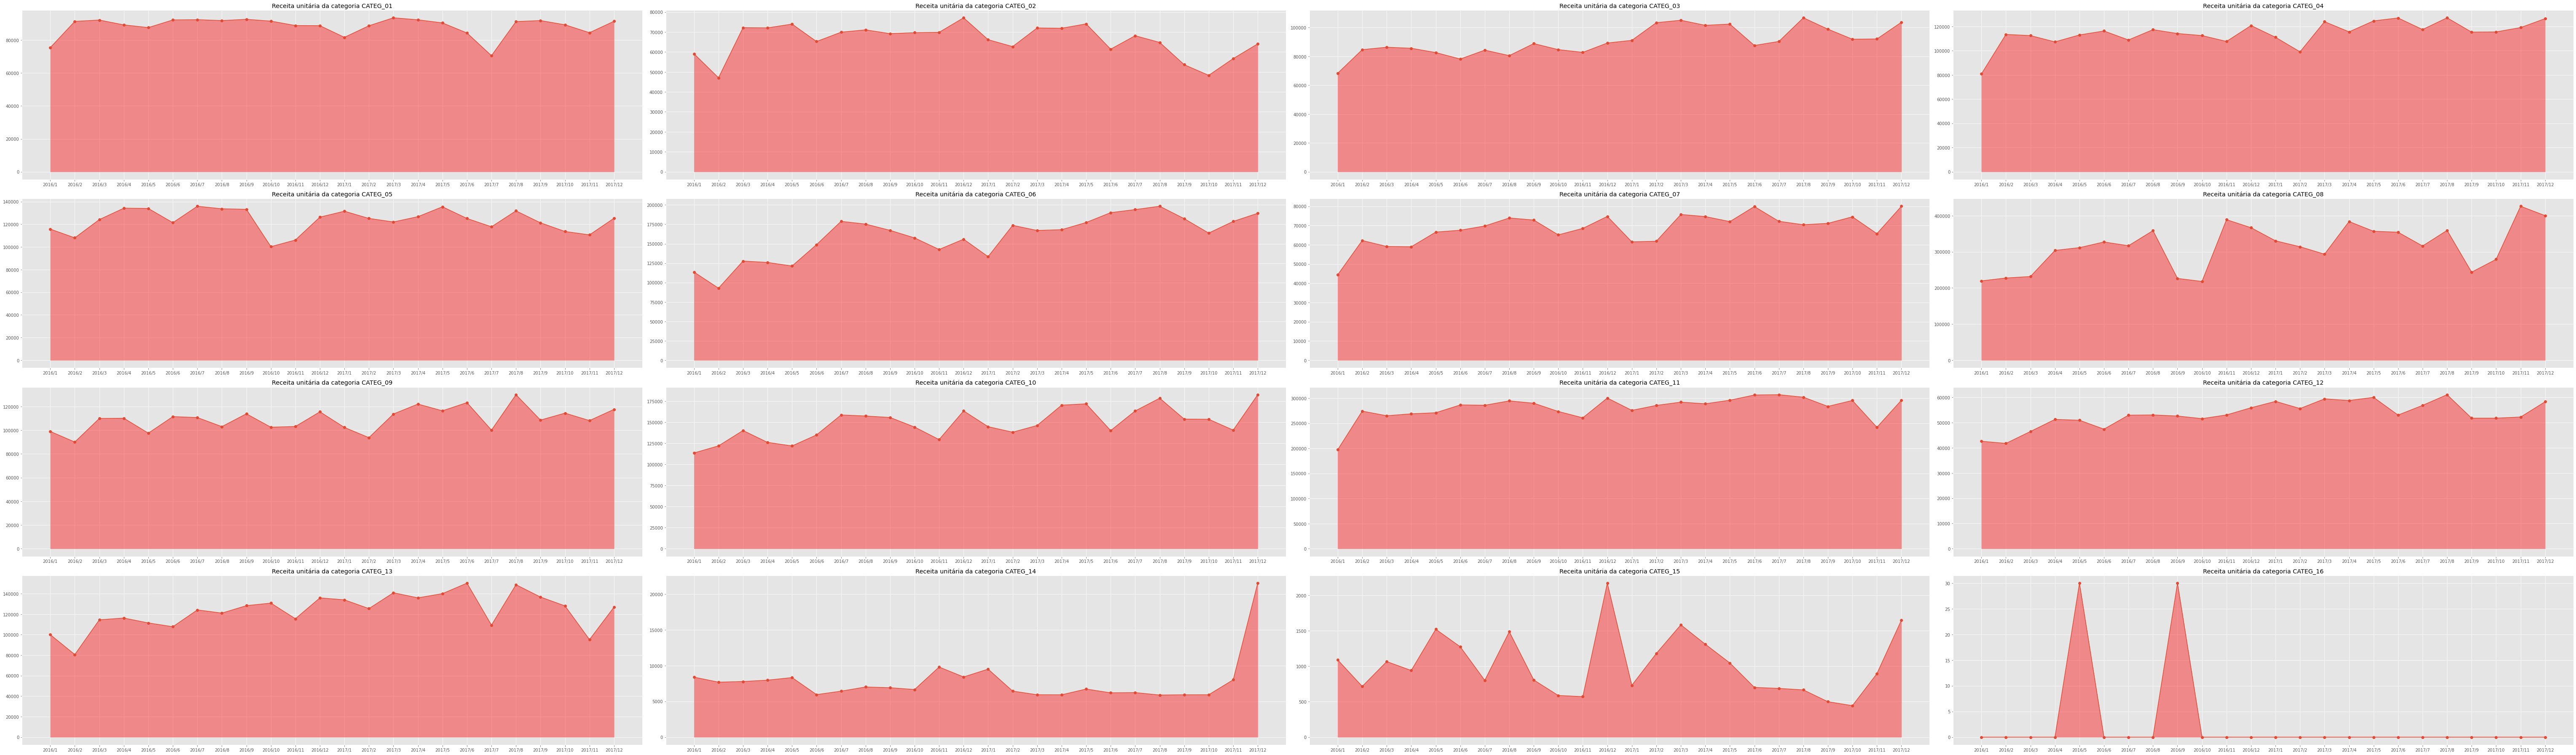

In [161]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["rec_un"], marker = "o")
    plt.fill_between(receita_periodo[0], receita_cats_periodo[cat]["rec_un"], color = "red", alpha = 0.4)
    plt.title("Receita unitária da categoria {}".format(cat))

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

Alguns gráficos mostram uma variação pequena na $Receita / Quantidade$, mas podemos levantar diversas questões:
- A quantidade também mudou de acordo com o tempo?
- Podemos tentar explicar a variação em algumas categorias de produtos?
- Se compararmos a receita e receita unitária entre os dois anos podemos observar alguma variação?

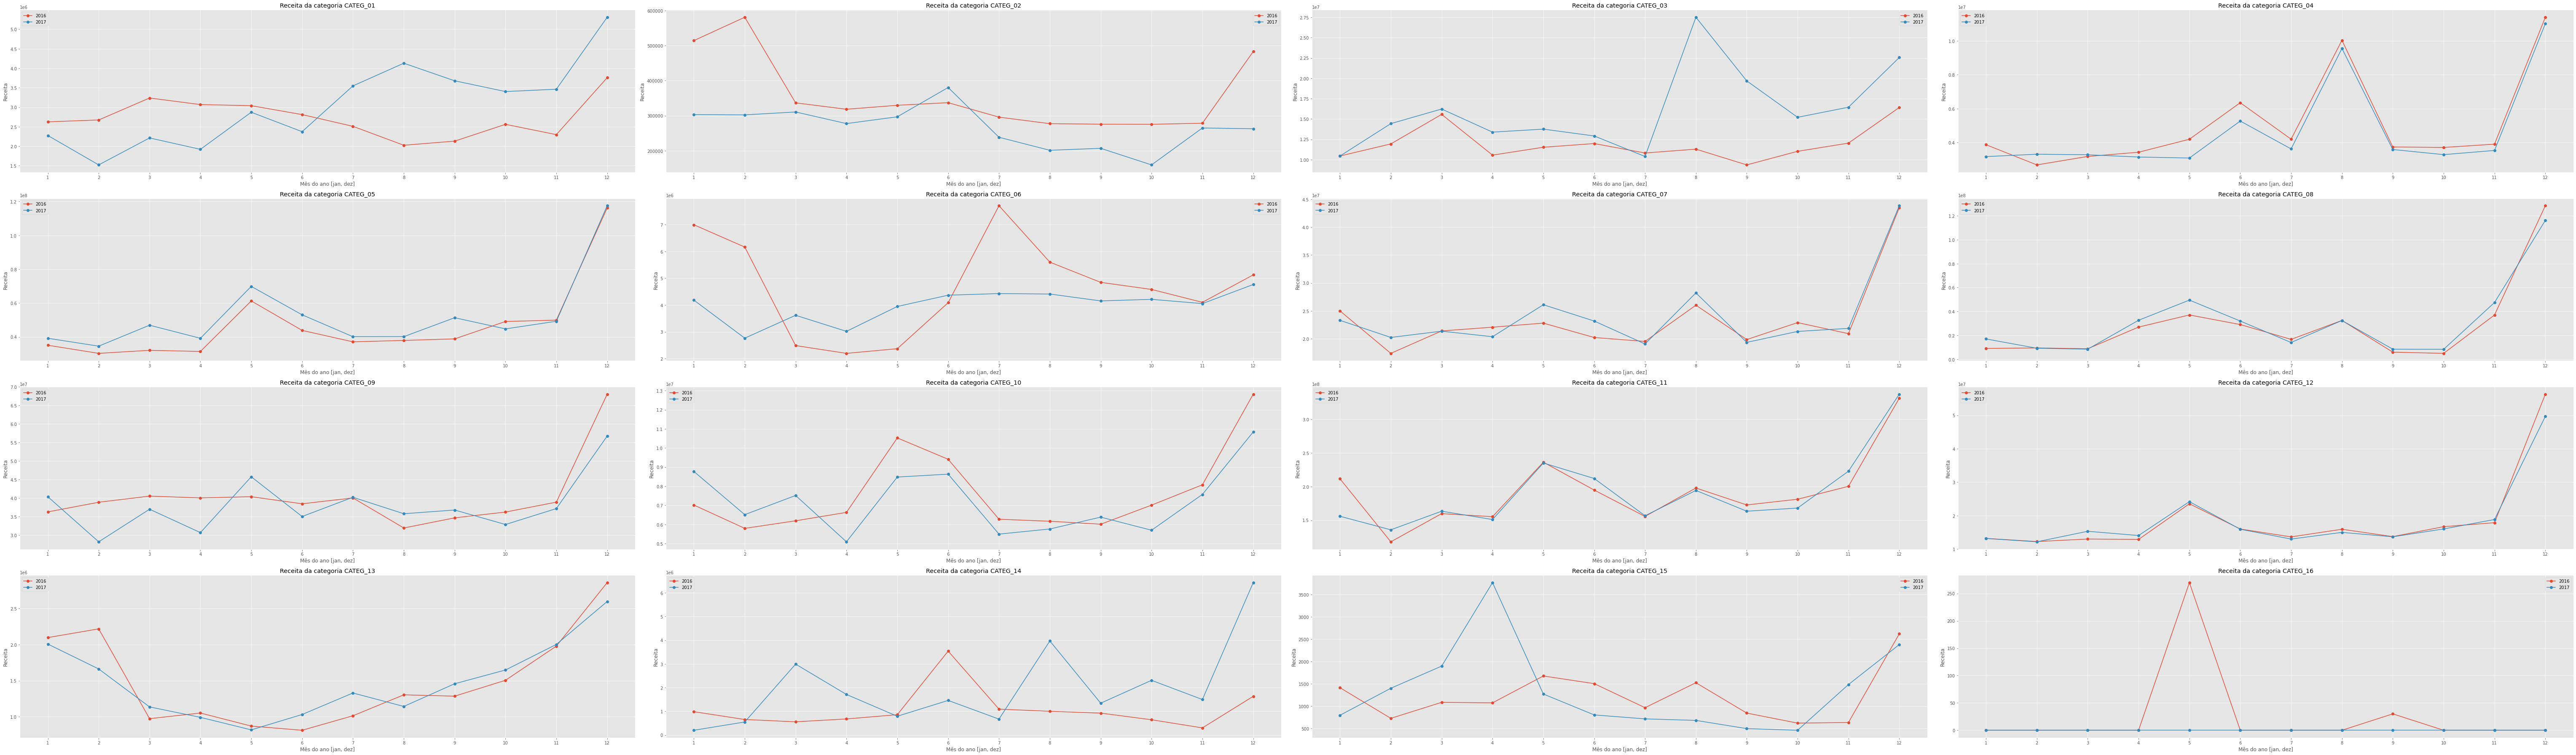

In [186]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    x_labels = pd.Series(receita_periodo[0][0:int(len(receita_periodo[0]) / 2)])
    x_labels = x_labels.apply(lambda x: x[5:])

    plt.plot(x_labels, receita_cats_periodo[cat]["receita"][0:int(len(receita_periodo[0]) / 2)], marker = "o", label = "2016")
    plt.plot(x_labels, receita_cats_periodo[cat]["receita"][int(len(receita_periodo[0]) / 2):], marker = "o", label = "2017")

    plt.title("Receita da categoria {}".format(cat))
    plt.xlabel("Mês do ano [jan, dez]")
    plt.ylabel("Receita")
    plt.legend()

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()